# Linear regression using Multiple varaible

## salary = m1 * experience + m2 * test_score + m3 * interview_score + b(intercept)

In [13]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import sys

In [19]:
# install word2number using conda command specifically for this verison of jupiter notebook

# !conda install --yes --prefix {sys.prefix} word2number (if this doesn't work then try with pip)

!{sys.executable} -m pip install word2number # this finally works for me ( conda didn't work)

  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5586 sha256=f1874f6b7e7db12fe0111e56ce282f9ccd1586d3e53aedca529394237f2d05b3
  Stored in directory: /Users/chandan/Library/Caches/pip/wheels/4b/c3/77/a5f48aeb0d3efb7cd5ad61cbd3da30bbf9ffc9662b07c9f879
Successfully built word2number


In [20]:
from word2number import w2n

In [3]:
df = pd.read_csv('experience_salary.csv')

In [6]:
df.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


### Cleaning the dataset to have only values and no string or NAN values

In [22]:
# The first 2 rows for expereince is having NAN value and so wee need to clean our dataset first
# using the function fillna() to fill any NAN value with the specified value as an argument, in this case 'zero'
df.experience = df.experience.fillna('zero')

In [23]:
#converting the experience column to numbers to use them for modelling as modelling can only be done with numbers and not strings.
df.experience = df.experience.apply(w2n.word_to_num)

In [27]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [31]:
# Also the test score (out of 10) column consists of a NAN value and we need to provide it a number.
# Taking median of the floor values of column 'test_score' and then replacing it with the all the NAN values.

# Converting all the values of 'test_score' to floor values respectively and finding median
import math
median_test_score = math.floor(df['test_score(out of 10)'].mean())
median_test_score

7

In [32]:
# Replacing the NAN values in columns 'test_score' with median value computed above.
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(median_test_score)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


### Plotting the Dependent variable w.r.t to each independent variable

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Experience in years')

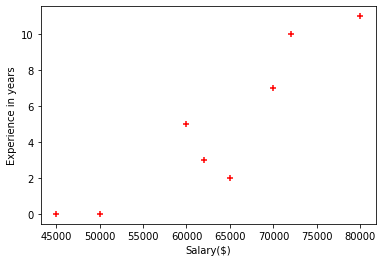

In [64]:
# Dependent Variable: Salary($)
# Plotting Salary($) w.r.t independent variable 'experience'

plt.scatter(df['salary($)'],df['experience'], marker='+', color="red")
plt.xlabel('Salary($)')
plt.ylabel('Experience in years')

Text(0, 0.5, 'Test score (out of 10)')

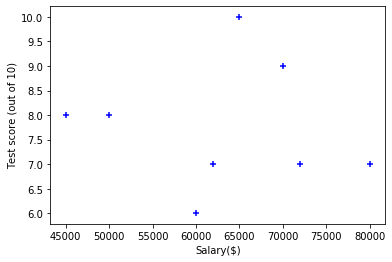

In [63]:
# Dependent Variable: Salary($)
# Plotting Salary($) w.r.t independent variable 'test_score(out of 10)'
plt.scatter(df['salary($)'],df['test_score(out of 10)'], marker='+', color="blue")
plt.xlabel('Salary($)')
plt.ylabel('Test score (out of 10)')

Text(0, 0.5, 'Interview Score(out of 10)')

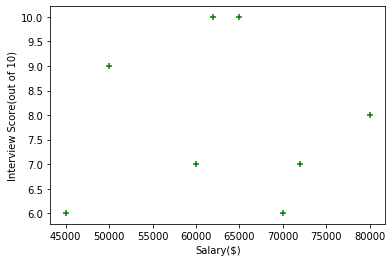

In [62]:
# Dependent Variable: Salary($)
# Plotting Salary($) w.r.t independent variable 'interview_score(out of 10)'
plt.scatter(df['salary($)'],df['interview_score(out of 10)'], marker='+', color="green")
plt.xlabel('Salary($)')
plt.ylabel('Interview Score(out of 10)')

### Creating a model using the sklearn linear_model for Linear regression and predicting

In [36]:
# creating a model
linearReg = linear_model.LinearRegression()
linearReg.fit(df[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']], df['salary($)'])

LinearRegression()

In [37]:
# predicting Salary($) for:
# experience = 2
# test_score(out of 10) = 9
# interview_score(out of 10)=6

linearReg.predict([[2,9,6]])

array([53713.86677124])

In [38]:
# predicting Salary($) for:
# experience = 12
# test_score(out of 10) = 10
# interview_score(out of 10) =10

linearReg.predict([[12,10,10]])

array([93747.79628651])

### confirming if the above two predictions are correct.

In [41]:
# get the coefficient (i.e, m1, m2, m3)
linearReg.coef_

array([2922.26901502, 2221.30909959, 2147.48256637])

In [42]:
# get the intercept (i.e, b)
linearReg.intercept_

14992.65144669314

In [44]:
# calculating using the formula
# salary = m1 * experience + m2 * test_score(out of 10) + m3 * interview_score(out of 10) + b

# experience = 2, test_score(out of 10) = 9, interview_score(out of 10) = 6
salary = 2922.26901502 * 2 + 2221.30909959 * 9 + 2147.48256637 * 6 + 14992.65144669314
salary

53713.86677126314

In [45]:
# experience = 12, test_score(out of 10) = 10, interview_score(out of 10) = 10
salary = 2922.26901502 * 12 + 2221.30909959 * 10 + 2147.48256637 * 10 + 14992.65144669314
salary

93747.79628653315

# END